<a href="https://colab.research.google.com/github/Hannan7812/Neural-Network-Projects/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
dataset = pd.read_csv('AMZN.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,248.270004,251.000000,244.660004,247.880005,247.880005,3950800
1,2012-09-05,247.610001,248.610001,245.300003,246.220001,246.220001,2652600
2,2012-09-06,248.229996,252.699997,247.199997,251.380005,251.380005,5361400
3,2012-09-07,253.850006,259.420013,253.520004,259.140015,259.140015,5029500
4,2012-09-10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200
...,...,...,...,...,...,...,...
1253,2017-08-28,946.539978,953.000000,942.250000,946.020020,946.020020,2596700
1254,2017-08-29,940.000000,956.000000,936.330017,954.059998,954.059998,2874300
1255,2017-08-30,958.440002,969.409973,956.909973,967.590027,967.590027,2904600
1256,2017-08-31,974.700012,981.000000,972.760010,980.599976,980.599976,3331500


In [ ]:
training_set = dataset.iloc[:, 1:2].values
print(training_set)
print(training_set.shape)

[[248.270004]
 [247.610001]
 [248.229996]
 ...
 [958.440002]
 [974.700012]
 [984.200012]]
(1258, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.03178346],
       [0.03100538],
       [0.0317363 ],
       ...,
       [0.86901108],
       [0.8881802 ],
       [0.89937985]])

In [ ]:
x_train = []
y_train = []
for x in range(60, 1258):
  x_train.append(scaled_training_set[x-60:x, 0])
  y_train.append(scaled_training_set[x, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train

array([[0.03178346, 0.03100538, 0.0317363 , ..., 0.02582996, 0.02492219,
        0.0315241 ],
       [0.03100538, 0.0317363 , 0.03836179, ..., 0.02492219, 0.0315241 ,
        0.03427097],
       [0.0317363 , 0.03836179, 0.04443318, ..., 0.0315241 , 0.03427097,
        0.0368174 ],
       ...,
       [0.93215358, 0.92502118, 0.93222431, ..., 0.86613453, 0.85498201,
        0.84727195],
       [0.92502118, 0.93222431, 0.93274304, ..., 0.85498201, 0.84727195,
        0.86901108],
       [0.93222431, 0.93274304, 0.87910256, ..., 0.84727195, 0.86901108,
        0.8881802 ]])

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1), dropout=0.2),
    tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(50, dropout=0.2),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='Adam', loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 14s 149ms/step - loss: 0.0354
Epoch 2/50
38/38 [==============================] - 5s 119ms/step - loss: 0.0034
Epoch 3/50
38/38 [==============================] - 5s 139ms/step - loss: 0.0029
Epoch 4/50
38/38 [==============================] - 5s 125ms/step - loss: 0.0031
Epoch 5/50
38/38 [==============================] - 4s 117ms/step - loss: 0.0030
Epoch 6/50
38/38 [==============================] - 6s 150ms/step - loss: 0.0032
Epoch 7/50
38/38 [==============================] - 4s 116ms/step - loss: 0.0031
Epoch 8/50
24/38 [=================>............] - ETA: 1s - loss: 0.0031

KeyboardInterrupt: ignored

In [ ]:
predicted = model.predict(x_train)
predicted = scaler.inverse_transform(predicted)

38/38 [==============================] - 5s 33ms/step


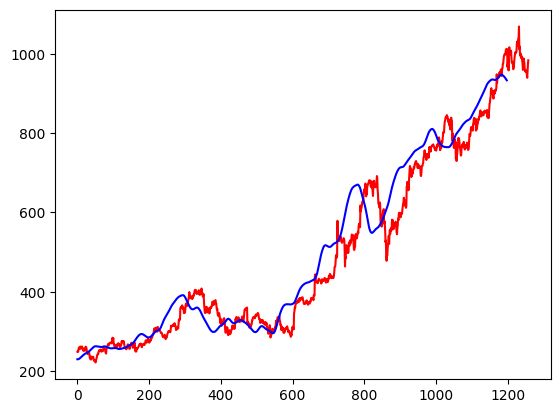

In [ ]:
actual = dataset.iloc[:, 1:2].values
plt.plot(actual, color='red')
plt.plot(predicted, color='blue')